In [1]:
import os
import numpy as np
import h5py
import scipy.io
np.random.seed(7) # for reproducibility

import keras.backend as K
from keras.models import Model, load_model

import matplotlib.pyplot as plt
import matplotlib
#from concise.utils.plot import seqlogo, seqlogo_fig

import sys
sys.path.append("../Scripts/")
from IntegratedGradients import *
from util_funcs import *
from plotseqlogo import seqlogo, seqlogo_fig

Using TensorFlow backend.
../Scripts/plotseqlogo.py:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
../Scripts/plotseqlogo.py:42: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


In [2]:
### library to use R
%load_ext rpy2.ipython
%load_ext rmagic

/anaconda3/lib/python3.7/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


In [3]:
path_to_data = "/Users/storm/git/Multi-resBind/Data/"

path_to_datalow = path_to_data + "data_RBPslow.h5"
X_test_seq_low, X_test_region_low, y_test_RBP_low, y_test_name_low, y_train_low = load_data(path_to_datalow)
print (X_test_seq_low.shape)
print (X_test_region_low.shape)
print (y_test_RBP_low.shape)
print (y_test_name_low.shape)
print (y_train_low.shape)

(7969, 150, 4)
(7969, 250, 4)
(7969, 27)
(7969,)
(56547, 27)


In [4]:
#load models and obtain prediction and integrated_gradients
path_to_model = "/Users/storm/git/Multi-resBind/results/multi_resBind_vs_DeepRiPe/"
path_to_model_DeepRipe= path_to_model + "DeepRiPe_low_model.h5"

In [5]:
model_DeepRiPe=load_model(path_to_model_DeepRipe, custom_objects={'precision': precision,'recall': recall }) 
pred_DeepRiPe=model_DeepRiPe.predict([X_test_seq_low, X_test_region_low])

Instructions for updating:
Colocations handled automatically by placer.


2021-05-11 11:30:26,446 [WARNING] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


2021-05-11 11:30:26,865 [WARNING] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


In [6]:
#RBPnames for each model
RBPnames_low=np.array(['MBNL1', 'P53_NONO', 'PUM2', 'QKI', 'AGO3', 'FUS', 'TAF15', 'ZFP36', 'DICER1', 'EIF3A', 'EIF3D', 'EIF3G', 'SSB', 'PAPD5', 'CPSF4', 'CPSF3', 'RTCB', 'FXR1', 'NOP58', 'NOP56', 'FBL', 'LIN28A', 'LIN28B', 'UPF1', 'G35', 'G45', 'XPO5'])

In [7]:
#number of tasks for each model
num_task_low=len(RBPnames_low)

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
import matplotlib

In [9]:
y_true=y_test_RBP_low
type(y_true) == np.ndarray
y_pred_DeepRiPe=pred_DeepRiPe

In [10]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_DeepRiPe[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_DeepRiPe[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_DeepRiPe[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_DeepRiPe = average_precision_low
roc_auc_DeepRiPe = roc_auc_low

In [11]:
RBP_labels_values = np.array([7811, 2223, 2347, 951, 5475, 5670, 3278, 1208, 2885, 874, 908, 623, 4809, 574, 1417, 1674, 588, 2084, 4574, 4520, 3582, 2311, 3659, 1393, 739, 913, 4320])

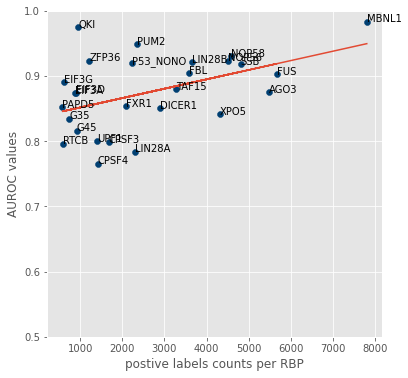

In [12]:
# plot the Fig.S3 (a)
from matplotlib import style
x = RBP_labels_values
y = roc_auc_DeepRiPe
n = RBPnames_low
lineStart = 0.5
lineEnd = 1

style.use('ggplot')
f = plt.figure(figsize = (6,6))
plt.scatter(x, y,color='#003F72')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.ylim(lineStart, lineEnd)
#plt.title('The relationship between AUROC values and postive labels counts ')
plt.xlabel('postive labels counts per RBP')
plt.ylabel('AUROC values')
plt.show()
#f.savefig("positive_labels_VS_AUROC_values.pdf", bbox_inches='tight')

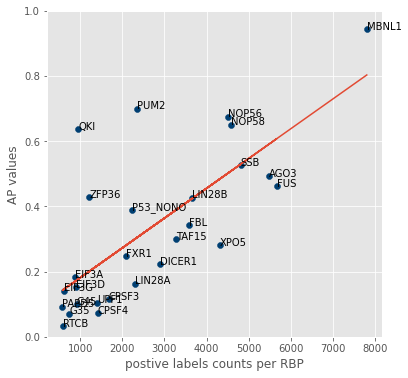

In [13]:
# plot the Fig.S3 (b)
x = RBP_labels_values
y = average_precision_DeepRiPe
n = RBPnames_low
lineStart = 0.
lineEnd = 1

style.use('ggplot')
f = plt.figure(figsize = (6,6))
plt.scatter(x, y,color='#003F72')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.ylim(lineStart, lineEnd)
#plt.title('The relationship between AP values and postive labels counts ')
plt.xlabel('postive labels counts per RBP')
plt.ylabel('AP values')
plt.show()
#f.savefig("positive_labels_VS_AP_values.pdf", bbox_inches='tight')